In [1]:
import cv2
from PIL import Image

import matplotlib.pyplot as plt
import re

In [2]:
import pytesseract
from pytesseract import image_to_string
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
img = cv2.imread('ex1.jpg', 0)

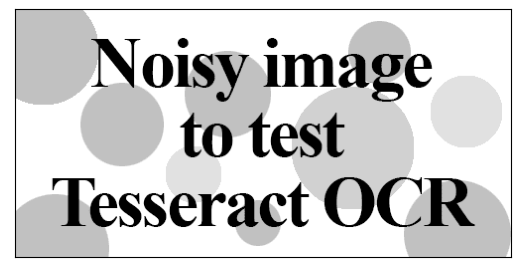

In [4]:
plt.imshow(img, cmap='gray');
plt.xticks([]);
plt.yticks([]);

In [5]:
image_to_string(img)

'Noisyimage\nto test\nTesseract OCR\n'

In [6]:
re.sub('\n', ' ', image_to_string(img))

'Noisyimage to test Tesseract OCR '

In [7]:
# For Noisy Background

img_blur = cv2.medianBlur(img, 3)
_, img_thresh = cv2.threshold(img_blur, 50, 255, cv2.THRESH_BINARY)

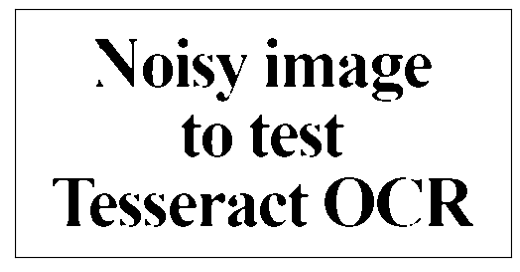

In [8]:
plt.imshow(img_thresh, cmap='gray');
plt.xticks([]);
plt.yticks([]);

In [9]:
re.sub('\n', ' ', image_to_string(img_thresh))

'Noisy image to test Tesseract OCR '

In [10]:
img2 = cv2.imread('ex2.png')

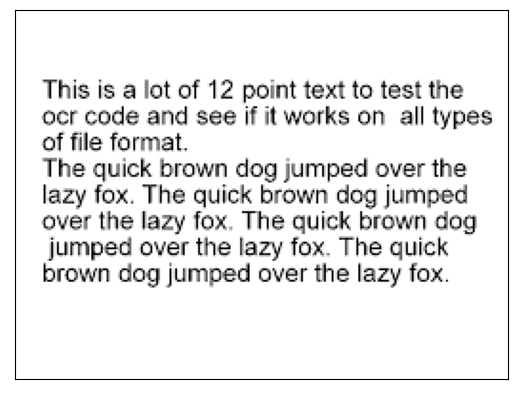

In [11]:
plt.imshow(img2, cmap='gray');
plt.xticks([]);
plt.yticks([]);

In [12]:
re.sub('\n', ' ', pytesseract.image_to_string(img2))

'This is a lot of 12 point text to test the ocr code and see if it works on all types of file format,  The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox '

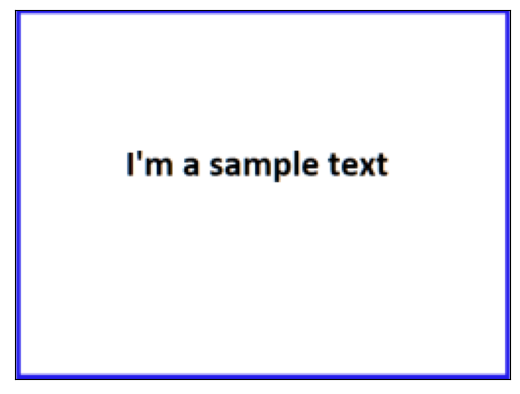

In [13]:
img3 = cv2.imread('ex3.png')

plt.imshow(img3, cmap='gray');
plt.xticks([]);
plt.yticks([]);

In [14]:
boxes = pytesseract.image_to_boxes(img3)

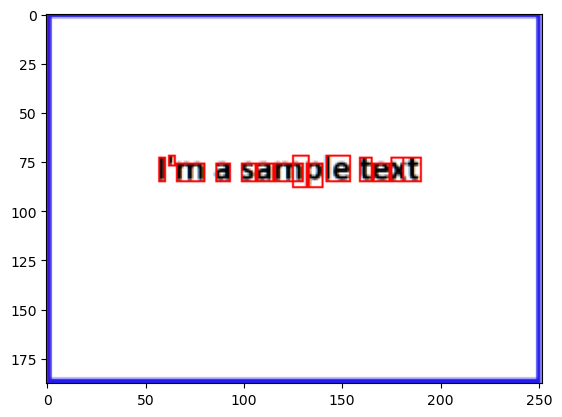

In [15]:
w, h, c = img3.shape

for box_coordinate in boxes.split('\n'):
    box_coordinate= box_coordinate.split(' ')
    
    if box_coordinate[0]:
        x1 = int(box_coordinate[1])
        y1 = int(box_coordinate[2])
        x2 = int(box_coordinate[3])
        y2 = int(box_coordinate[4])

        cv2.rectangle(img3, (x1, w-y1), (x2,  w-y2), (255, 0, 0), 1)
        
plt.imshow(img3)


    
    
    

In [16]:
from pytesseract import Output

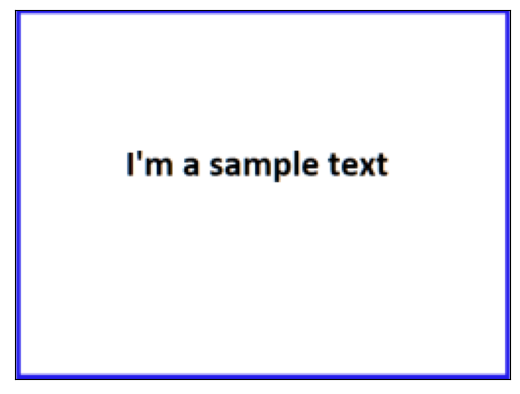

In [17]:
img3 = cv2.imread('ex3.png')

plt.imshow(img3, cmap='gray');
plt.xticks([]);
plt.yticks([]);

img_data = pytesseract.image_to_data(img3, output_type=Output.DICT)

In [18]:
img_data

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1],
 'left': [0, 57, 57, 57, 57, 86, 99, 159, 0, 0, 0, 0],
 'top': [0, 72, 72, 72, 72, 76, 72, 73, 0, 0, 0, 0],
 'width': [252, 133, 133, 133, 23, 7, 55, 31, 252, 252, 252, 252],
 'height': [188, 16, 16, 16, 13, 9, 16, 12, 188, 188, 188, 188],
 'conf': [-1, -1, -1, -1, 73, 73, 95, 84, -1, -1, -1, 95],
 'text': ['', '', '', '', "I'm", 'a', 'sample', 'text', '', '', '', '']}

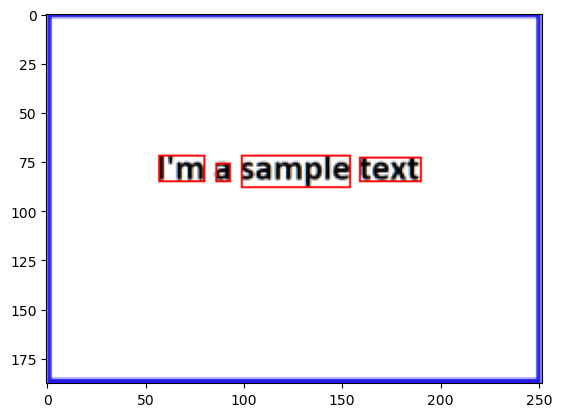

In [19]:
for index, text in enumerate(img_data['text']):
    if text:
        x1 = int(img_data['left'][index])
        y1 = int(img_data['top'][index])
        
        x2 = x1 + int(img_data['width'][index])        
        y2 = y1 + int(img_data['height'][index])
        
        cv2.rectangle(img3, (x1, y1), (x2, y2), (255, 0, 0), 1)
        
plt.imshow(img3)

In [20]:
pytesseract.get_languages()

['eng', 'fas', 'osd']

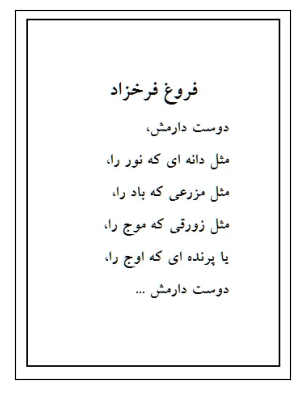

In [21]:
fa = cv2.imread('fa.png')

plt.imshow(fa, cmap='gray');
plt.xticks([]);
plt.yticks([]);

In [22]:
fa_sen = pytesseract.image_to_string(fa, lang='fas')

In [23]:
print(fa_sen)

فروغ فرخزاد
دوست دارمش:
مثل دانه ای که ور را؛
مثل مزرعی که باد راء
مثل زورقی که موج را»
يا پرنده ای که اوج راء

دوست دارمش ...


